# 0. Load library

In [1]:
import torch
import torchvision
from torch import nn
import os

from torchinfo import summary

import matplotlib.pyplot as plt
import numpy as np

# Note: this notebook requires torch >= 1.10.0
torch.__version__

'2.1.0'

In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
NUM_WORKERS = os.cpu_count()
NUM_WORKERS

8

# Explore dataset!

## Walkthrough

In [4]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
walk_through_dir("final_dataset")

There are 2 directories and 0 images in 'final_dataset'.
There are 2 directories and 0 images in 'final_dataset/test'.
There are 0 directories and 1805 images in 'final_dataset/test/0'.
There are 0 directories and 1857 images in 'final_dataset/test/1'.
There are 2 directories and 0 images in 'final_dataset/train'.
There are 0 directories and 25810 images in 'final_dataset/train/0'.
There are 0 directories and 45476 images in 'final_dataset/train/1'.


Random image path: final_dataset/train/0/1_25277_left.jpeg
Image class: 0
Image height: 448
Image width: 448


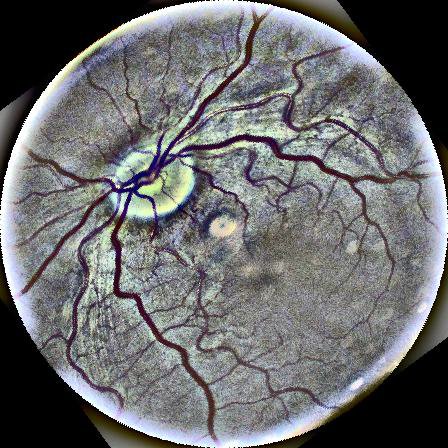

In [6]:
import random
from PIL import Image
from pathlib import Path

# Set seed
# random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path = Path("final_dataset")
image_path_list = list(image_path.glob("*/*/*.jpeg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

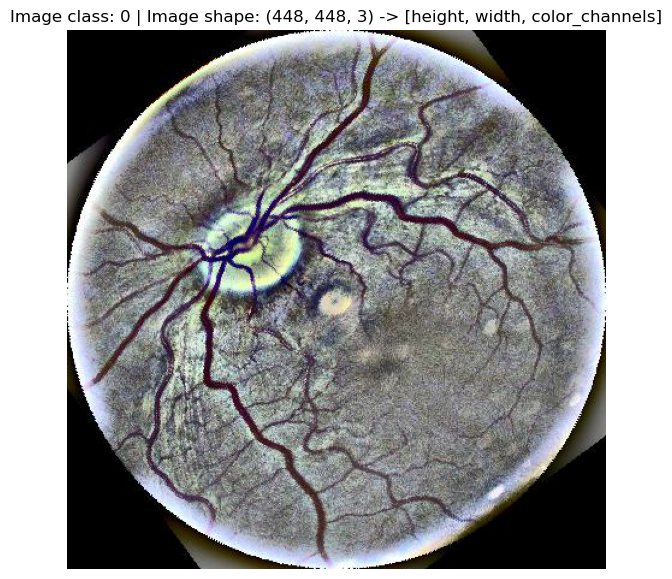

In [7]:
# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

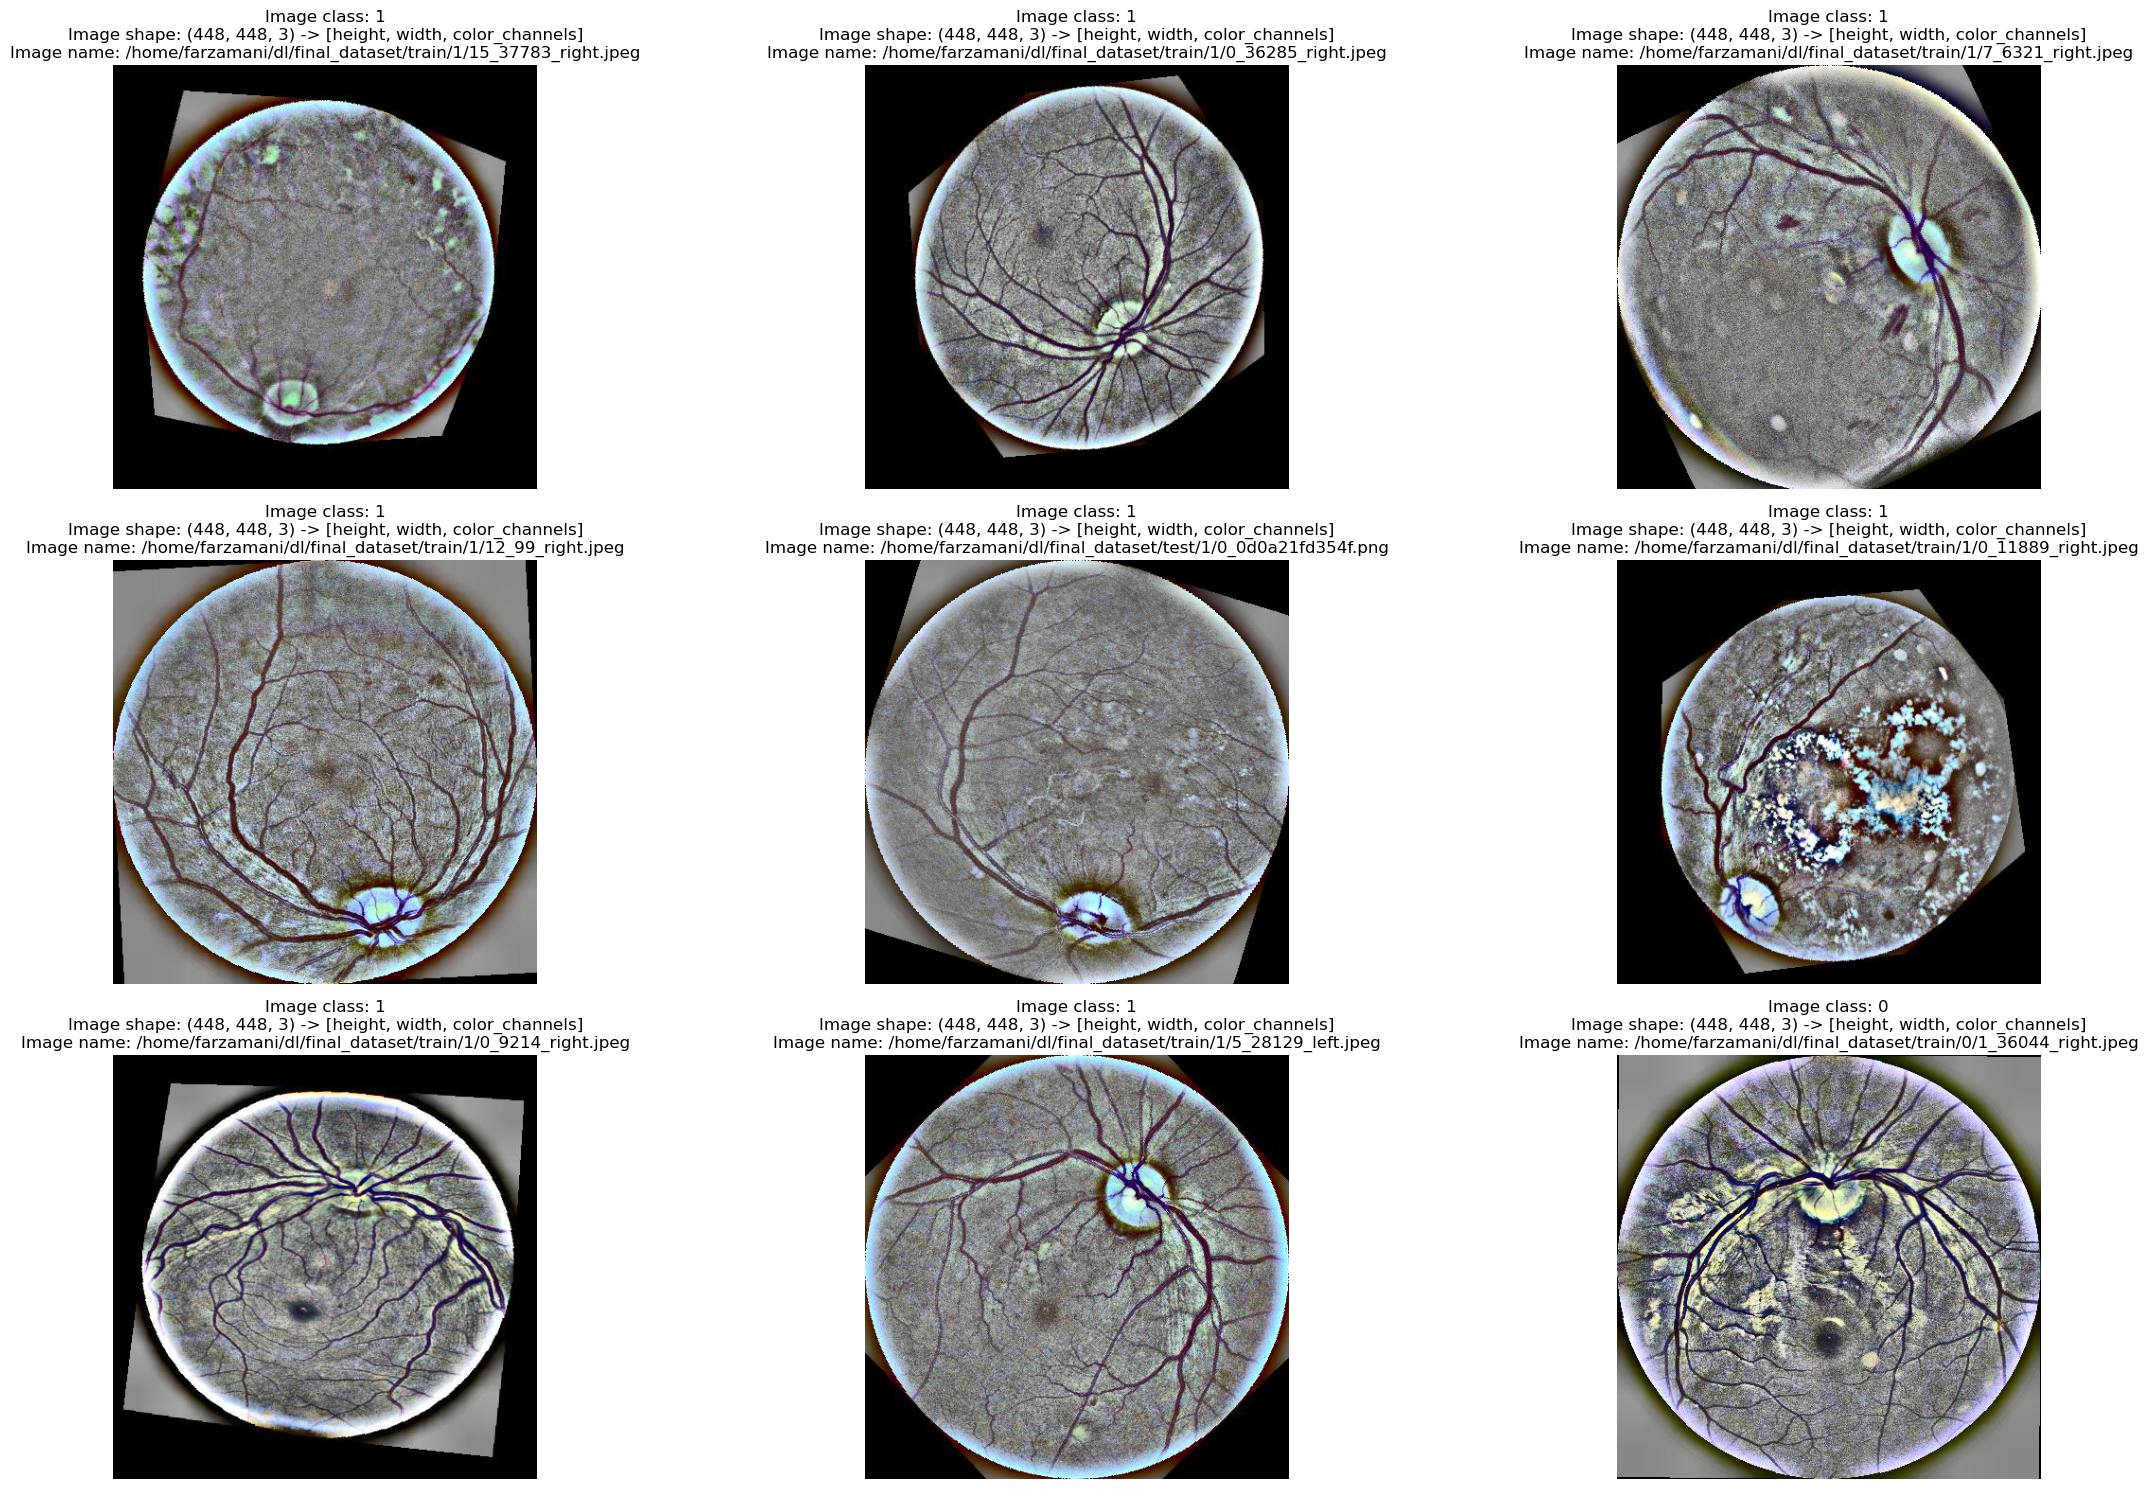

In [8]:
# Set seed
# random.seed(42)  # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path = "/home/farzamani/dl/final_dataset"
image_path = Path(image_path)
image_path_list = list(image_path.glob("*/*/*.*"))

# 2. Get 9 random image paths
random_image_paths = random.sample(image_path_list, 9)

# 3. Create a subplot to display the images
plt.figure(figsize=(25, 15))
for i, random_image_path in enumerate(random_image_paths):
    image_class = random_image_path.parent.stem

    # 4. Open image
    img = Image.open(random_image_path)

    # Turn the image into an array
    img_as_array = np.asarray(img)

    # Add a subplot for each image
    plt.subplot(3, 3, i + 1)
    plt.imshow(img_as_array)
    plt.title(f"Image class: {image_class}\nImage shape: {img_as_array.shape} -> [height, width, color_channels]\nImage name: {random_image_path}")
    plt.axis(False)

# Show all 10 images
plt.tight_layout()
plt.show()

# Prepare Dataset with Image Folder

In [9]:
# Use ImageFolder to create dataset(s)

train_dir = os.path.join(os.getcwd(), "final_dataset", "train")
test_dir = os.path.join(os.getcwd(), "final_dataset", "test")

from torchvision import datasets
from torchvision.transforms import v2

# Define the transform
train_transform = v2.Compose([
    # v2.AutoAugment(),
    v2.CenterCrop(384),
    v2.PILToTensor(),
    v2.ToDtype(torch.float32, scale=True),
])

val_transform = v2.Compose([
    v2.CenterCrop(384),
    v2.PILToTensor(),
    v2.ToDtype(torch.float32, scale=True),
])

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=train_transform)

val_data = datasets.ImageFolder(root=test_dir,
                                transform=val_transform)

print(f"Train data:\n{train_data}\nTest data:\n{val_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 71286
    Root location: /home/farzamani/dl/final_dataset/train
    StandardTransform
Transform: Compose(
                 CenterCrop(size=(384, 384))
                 PILToTensor()
                 ToDtype(scale=True)
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 3662
    Root location: /home/farzamani/dl/final_dataset/test
    StandardTransform
Transform: Compose(
                 CenterCrop(size=(384, 384))
                 PILToTensor()
                 ToDtype(scale=True)
           )


In [10]:
img, label = train_data[20][0], train_data[20][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.6275, 0.6275, 0.6275,  ..., 0.6118, 0.6118, 0.6118],
         [0.6275, 0.6275, 0.6275,  ..., 0.6118, 0.6118, 0.6118],
         [0.6314, 0.6314, 0.6314,  ..., 0.6118, 0.6118, 0.6118],
         ...,
         [0.6275, 0.6275, 0.6314,  ..., 0.6196, 0.6196, 0.6196],
         [0.6275, 0.6275, 0.6314,  ..., 0.6157, 0.6157, 0.6157],
         [0.6275, 0.6275, 0.6314,  ..., 0.6157, 0.6157, 0.6157]],

        [[0.6275, 0.6275, 0.6275,  ..., 0.6118, 0.6118, 0.6118],
         [0.6275, 0.6275, 0.6275,  ..., 0.6118, 0.6118, 0.6118],
         [0.6314, 0.6314, 0.6314,  ..., 0.6118, 0.6118, 0.6118],
         ...,
         [0.6275, 0.6275, 0.6314,  ..., 0.6196, 0.6196, 0.6196],
         [0.6275, 0.6275, 0.6314,  ..., 0.6157, 0.6157, 0.6157],
         [0.6275, 0.6275, 0.6314,  ..., 0.6157, 0.6157, 0.6157]],

        [[0.6275, 0.6275, 0.6275,  ..., 0.6118, 0.6118, 0.6118],
         [0.6275, 0.6275, 0.6275,  ..., 0.6118, 0.6118, 0.6118],
         [0.6314, 0.6314, 0.6314,  ..., 0.61

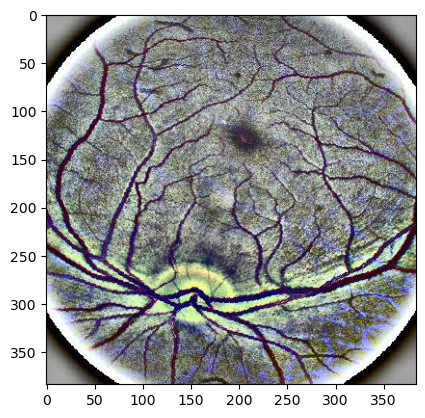

In [11]:
import matplotlib.pyplot as plt
plt.imshow(img.permute(1, 2, 0))

# DataLoader

In [12]:
# Create training and testing DataLoaders as well as get a list of class names
from torchmodules import preprocessing
train_dataloader, test_dataloader, class_names = preprocessing.create_dataloaders(train_dir = train_dir,
                                                                                  test_dir = test_dir,
                                                                                  train_transform = train_transform, # perform same data transforms on our own data as the pretrained model
                                                                                  val_transform = val_transform,
                                                                                  batch_size = 32,
                                                                                  num_workers = NUM_WORKERS) # set mini-batch size to 32 (default)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7f7f5ee3cdd0>,
 ['0', '1'])

# Setup Model

In [13]:
# Get a set of pretrained model weights
# weights = torchvision.models.EfficientNet_V2_S_Weights.DEFAULT
weights = torchvision.models.MobileNet_V3_Large_Weights.IMAGENET1K_V2
weights

MobileNet_V3_Large_Weights.IMAGENET1K_V2

In [14]:
# model = torchvision.models.efficientnet_v2_s(weights=weights).to(device)
model = torchvision.models.mobilenet_v3_large(weights=weights).to(device)

In [15]:
# Print a summary using torchinfo (uncomment for actual output)
summary(model=model, 
        input_size=(32, 3, 384, 384), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
) 

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
MobileNetV3 (MobileNetV3)                                    [32, 3, 384, 384]    [32, 1000]           --                   True
├─Sequential (features)                                      [32, 3, 384, 384]    [32, 960, 12, 12]    --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 384, 384]    [32, 16, 192, 192]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 384, 384]    [32, 16, 192, 192]   432                  True
│    │    └─BatchNorm2d (1)                                  [32, 16, 192, 192]   [32, 16, 192, 192]   32                   True
│    │    └─Hardswish (2)                                    [32, 16, 192, 192]   [32, 16, 192, 192]   --                   --
│    └─InvertedResidual (1)                                  [32, 16, 192, 192]   [32, 16, 192

In [16]:
print(model.classifier)

Sequential(
  (0): Linear(in_features=960, out_features=1280, bias=True)
  (1): Hardswish()
  (2): Dropout(p=0.2, inplace=True)
  (3): Linear(in_features=1280, out_features=1000, bias=True)
)


In [17]:
# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)
# Recreate the classifier layer based on the last layer and seed it to the target device
# model.classifier = nn.Sequential(
#     nn.Linear(in_features=1280, out_features=256, bias=True),
#     nn.ReLU(),
#     nn.Dropout(p=0.5),
#     nn.Linear(in_features=256, out_features=128, bias=True),
#     nn.ReLU(),
#     nn.Dropout(p=0.5),
#     nn.Linear(in_features=128, out_features=output_shape, bias=True)
# ).to(device)

# model.classifier = nn.Sequential(
#     nn.Linear(in_features=1280, out_features=128, bias=True),
#     nn.ReLU(),
#     nn.Dropout(p=0.5),
#     nn.Linear(in_features=128, out_features=output_shape, bias=True)
# ).to(device)

model.classifier = nn.Sequential(
    nn.Linear(in_features=960, out_features=1024, bias=True),
    nn.Hardswish(),
    nn.Dropout(p=0.4),
    nn.Linear(in_features=1024, out_features=output_shape, bias=True),
).to(device)

In [18]:
print(model.classifier)

Sequential(
  (0): Linear(in_features=960, out_features=1024, bias=True)
  (1): Hardswish()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=1024, out_features=2, bias=True)
)


### Freeze layers

In [19]:
# Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
for name, param in model.named_parameters():
    if "classifier" in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

### Summary

In [20]:
# Print a summary using torchinfo (uncomment for actual output)
summary(model=model, 
        input_size=(32, 3, 384, 384), # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
) 

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
MobileNetV3 (MobileNetV3)                                    [32, 3, 384, 384]    [32, 2]              --                   Partial
├─Sequential (features)                                      [32, 3, 384, 384]    [32, 960, 12, 12]    --                   False
│    └─Conv2dNormActivation (0)                              [32, 3, 384, 384]    [32, 16, 192, 192]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 384, 384]    [32, 16, 192, 192]   (432)                False
│    │    └─BatchNorm2d (1)                                  [32, 16, 192, 192]   [32, 16, 192, 192]   (32)                 False
│    │    └─Hardswish (2)                                    [32, 16, 192, 192]   [32, 16, 192, 192]   --                   --
│    └─InvertedResidual (1)                                  [32, 16, 192, 192]   [32, 

# Train model

In [21]:
from torchmodules import engine

# Set number of epochs
NUM_EPOCHS = 20

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(params=model.parameters(), lr=0.0001, momentum=0.9)
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001, weight_decay=1e-4)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model
# Setup training and save the results
results = engine.train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=NUM_EPOCHS,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Epoch: 1 | train_loss: 0.4131 | train_acc: 0.7870 | test_loss: 0.3584 | test_acc: 0.8716


0it [00:00, ?it/s]

Epoch: 2 | train_loss: 0.3843 | train_acc: 0.8079 | test_loss: 0.3274 | test_acc: 0.8814


0it [00:00, ?it/s]

Epoch: 3 | train_loss: 0.3789 | train_acc: 0.8097 | test_loss: 0.3565 | test_acc: 0.8491


0it [00:00, ?it/s]

Epoch: 4 | train_loss: 0.3761 | train_acc: 0.8121 | test_loss: 0.3337 | test_acc: 0.8743


0it [00:00, ?it/s]

Epoch: 5 | train_loss: 0.3714 | train_acc: 0.8135 | test_loss: 0.3146 | test_acc: 0.8824


0it [00:00, ?it/s]

Epoch: 6 | train_loss: 0.3698 | train_acc: 0.8154 | test_loss: 0.3284 | test_acc: 0.8761


0it [00:00, ?it/s]

Epoch: 7 | train_loss: 0.3673 | train_acc: 0.8172 | test_loss: 0.3966 | test_acc: 0.8152


0it [00:00, ?it/s]

Epoch: 8 | train_loss: 0.3646 | train_acc: 0.8189 | test_loss: 0.3418 | test_acc: 0.8658


0it [00:00, ?it/s]

Epoch: 9 | train_loss: 0.3642 | train_acc: 0.8181 | test_loss: 0.3304 | test_acc: 0.8778


0it [00:00, ?it/s]

Epoch: 10 | train_loss: 0.3622 | train_acc: 0.8191 | test_loss: 0.3258 | test_acc: 0.8805


0it [00:00, ?it/s]

Epoch: 11 | train_loss: 0.3611 | train_acc: 0.8199 | test_loss: 0.3621 | test_acc: 0.8468


0it [00:00, ?it/s]

Epoch: 12 | train_loss: 0.3601 | train_acc: 0.8212 | test_loss: 0.3368 | test_acc: 0.8701


0it [00:00, ?it/s]

Epoch: 13 | train_loss: 0.3588 | train_acc: 0.8228 | test_loss: 0.3506 | test_acc: 0.8604


0it [00:00, ?it/s]

Epoch: 14 | train_loss: 0.3573 | train_acc: 0.8233 | test_loss: 0.3862 | test_acc: 0.8172


0it [00:00, ?it/s]

Epoch: 15 | train_loss: 0.3577 | train_acc: 0.8227 | test_loss: 0.3296 | test_acc: 0.8833


0it [00:00, ?it/s]

Epoch: 16 | train_loss: 0.3568 | train_acc: 0.8238 | test_loss: 0.3341 | test_acc: 0.8759


0it [00:00, ?it/s]

Epoch: 17 | train_loss: 0.3559 | train_acc: 0.8247 | test_loss: 0.3161 | test_acc: 0.8901


0it [00:00, ?it/s]

Epoch: 18 | train_loss: 0.3547 | train_acc: 0.8247 | test_loss: 0.3529 | test_acc: 0.8549


0it [00:00, ?it/s]

Epoch: 19 | train_loss: 0.3553 | train_acc: 0.8251 | test_loss: 0.3631 | test_acc: 0.8495


0it [00:00, ?it/s]

Epoch: 20 | train_loss: 0.3542 | train_acc: 0.8246 | test_loss: 0.3774 | test_acc: 0.8299
Total training time: 11530.958 seconds


In [22]:
import torch

# Specify the file path where you want to save the model
save_path = 'models/model_6_mobilenet.pth'

# Save the entire model (including architecture, parameters, and optimizer state)
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
}, save_path)


In [23]:
import pickle

# Save to a file
with open('models/results_6_mobilenet.pickle', 'wb') as file:
    pickle.dump(results, file)

In [26]:
import pandas as pd
res = pd.read_pickle('models/results_6_mobilenet.pickle')
res = pd.DataFrame(res)
res.to_csv('models/results_6_mobilenet.csv')

res

train_loss  train_acc  test_loss  test_acc
0     0.413066   0.786960   0.358352  0.871584
1     0.384328   0.807874   0.327430  0.881366
2     0.378936   0.809716   0.356457  0.849146
3     0.376069   0.812105   0.333715  0.874301
4     0.371424   0.813526   0.314646  0.882376
5     0.369760   0.815420   0.328372  0.876126
6     0.367311   0.817167   0.396560  0.815179
7     0.364590   0.818921   0.341756  0.865800
8     0.364238   0.818126   0.330393  0.877756
9     0.362228   0.819073   0.325825  0.880474
10    0.361128   0.819896   0.362134  0.846778
11    0.360137   0.821234   0.336787  0.870148
12    0.358782   0.822799   0.350558  0.860365
13    0.357269   0.823259   0.386178  0.817158
14    0.357666   0.822735   0.329624  0.883269
15    0.356756   0.823779   0.334065  0.875854
16    0.355869   0.824704   0.316105  0.890062
17    0.354743   0.824722   0.352934  0.854930
18    0.355277   0.825106   0.363053  0.849495
19    0.354244   0.824613   0.377371  0.829930